# Computación de la transformada de Fourier en Python


### Espacio de nombres
Las librerias de python contienen funciones, agrupadas en modulos. Algunas de estas funciones tienen el mismo nombre. Para evitar conflictos, al llamar una libreria o modulo, se le puede asignar un alias. 
Ejemplo


In [ ]:
from numpy import *# importa todas las funciones de numpy sin definir un espacio de nombres. NO USAR

linspace(1,2,10) #linspace es una funcion de numpy y se llama por su nombre

array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ])

Se recomienda importar usando un espacio de nombres. Reseteemos nuestro kernel de python y probemos.

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True) #elimina todas las variables y resetea el kernel de python.

{'restart': True, 'status': 'ok'}

Una mejor forma de importar es

In [ ]:
import numpy  #importa todas las funciones de numpy bajo el espacio de nombres numpy
numpy.linspace(1,2,10) #linspace es una funcion de numpy y para 
                       #llamarla tenemos que escribir a que espacio de nombres pertenece

array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ])

Podemos cambiar los espacios de nombre importandolos con un alias.

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True) #elimina todas las variables y resetea el kernel de python.

import numpy as np #importa todas las funciones de numpy bajo el espacio de nombres np
np.linspace(1,2,10)

array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ])

### Arreglos

Los arreglos de numpy permiten computacion de alta eficiencia. Para crear un array hacemos

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True) #elimina todas las variables y resetea el kernel de python.

{'restart': True, 'status': 'ok'}

In [ ]:
import numpy as np

a=np.array([1,3,54,23]) #Los elementos en una dimension estan separados por , y entre corchetes
print('a=',a)

b=np.array([[1,3,54],[12,2,4]]) #Las dimensiones adicionales estan separadas por coma, y tambien entre corchetes
print('b=',b)

a= [ 1  3 54 23]
b= [[ 1  3 54]
 [12  2  4]]


Las operaciones basicas (suma, resta, multiplicacion, division etc..) sobre arreglos se realizan elemento a elemento.

Python es un lenguage de typeo dinamico. Es decir, el tipo de dato de una variable es determinado implicitamente por los datos que contiene. Esto es importante a la hora de trabajar con grandes cantidades de informacion

In [ ]:
a=np.array([1,3,54,23])
print('tipo de dato a=',a.dtype)

a=np.array([1.,3.,54.,23.])
print('tipo de dato a=',a.dtype)

a=np.array([1.+4.j,3.+4.j,54.+4.j,23.+4.j])
print('tipo de dato a=',a.dtype)

tipo de dato a= int64
tipo de dato a= float64
tipo de dato a= complex128


El ultimo numero del tipo de dato dice cuantos bits se requiere para almacenar cada elemento. Para un numero decimal se requiere el doble de memoria que para un entero, y para un numero complejo el cuadruple!! Como para operar con campos opticos usaremos representaciones usualmente complejas, esto limita el tamaño de los arreglos que podemos usar. Multiplicar un arreglo de enteros por un decimal automaticamente convierte el arreglo entero en uno tipo float. Lo mismo ocurre al multiplicar por un complejo. De esta forma una operacion puede subitamente aumentar los requisitos de memoria de mi programa. Tener en cuenta!

### Definir funciones

Para definir una funcion en python basta con usar el comando def, asi

In [ ]:
def test(a,b): #El nombre de la funcion es seguido de los argumentos entre parentesis. Puede haber funciones sin
    c=a+b      #argumentos
    e=a        
    return c   #return da cuenta de la salida de la funcion. Puede no tener ninguna salida.

q=test(1,2)
print(q)
#print(e)  #Las variables denfinidas dentro de la funcion no estan expuestas al resto del programa

3


In [ ]:
w=2
def test2(a,b): #Las variables definidas fuera de la funcion son visibles para la misma
    c=a+b+w        
    return c

test2(2,3)

7

In [ ]:
def test3(a,b): #Las variables definidas fuera de la funcion son visibles para la misma
    a=a+2       #Se puede operar sobre los argumentos sin alterar su informacion original. 
    c=a+b       
    return c
a=2
q=test3(a,3)   
print(q,a)

7 2


### Crear vectores coordenados

Existen varias formas de crear un vector con numpy. Si queremos vectores coordnados para evaluar funciones, tenenemos

In [ ]:
xmax=1
xmin=-1
muestras=10
dx=(xmax-xmin)/(muestras-1)
x=np.linspace(xmin,xmax,muestras) #Linspace crea un vector de valores equiespaciados con un numero de elementos igual a samples cuyo valor inicial es xmin, y el final es xmax.

print(x,dx)

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ] 0.2222222222222222


In [ ]:
xmax=1
xmin=-1
dx=0.25
x=np.arange(xmin,xmax,dx) #arange crea un vector con inicio en xmin, fin en xmax-dx e intervalo dx
print(x,dx)

[-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75] 0.25


En base a estas funciones, para crear un par de vectores con coordenadas para una transformada de Fourier tendriamos


[-5.0000000e+00 -4.8000000e+00 -4.6000000e+00 -4.4000000e+00
 -4.2000000e+00 -4.0000000e+00 -3.8000000e+00 -3.6000000e+00
 -3.4000000e+00 -3.2000000e+00 -3.0000000e+00 -2.8000000e+00
 -2.6000000e+00 -2.4000000e+00 -2.2000000e+00 -2.0000000e+00
 -1.8000000e+00 -1.6000000e+00 -1.4000000e+00 -1.2000000e+00
 -1.0000000e+00 -8.0000000e-01 -6.0000000e-01 -4.0000000e-01
 -2.0000000e-01  4.4408921e-15  2.0000000e-01  4.0000000e-01
  6.0000000e-01  8.0000000e-01  1.0000000e+00  1.2000000e+00
  1.4000000e+00  1.6000000e+00  1.8000000e+00  2.0000000e+00
  2.2000000e+00  2.4000000e+00  2.6000000e+00  2.8000000e+00
  3.0000000e+00  3.2000000e+00  3.4000000e+00  3.6000000e+00
  3.8000000e+00  4.0000000e+00  4.2000000e+00  4.4000000e+00
  4.6000000e+00  4.8000000e+00]
[-2.50000000e+00 -2.40000000e+00 -2.30000000e+00 -2.20000000e+00
 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00 -1.80000000e+00
 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00 -1.40000000e+00
 -1.30000000e+00 -1.20000000e+00 -1.10000

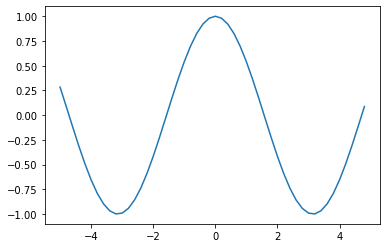

In [ ]:
L=10
xmin=-10/2
xmax=10/2
dx=0.2
fmax=1/(2*dx)
fmin=-1/(2*dx)
dfx=1/L
x=np.arange(xmin,xmax,dx) #Vector coordenadas espaciales.
fx=np.arange(fmin,fmax,dfx) #Vector coordenadas frecuenciales.
print(x)
print(fx)
import matplotlib.pyplot as plt
y=(np.cos(x))
plt.plot(x,y)

Para crear espacios coordenados en dos dimensiones, usamos meshgrid

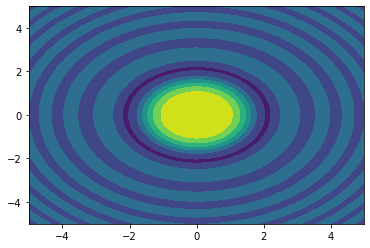

In [ ]:
Lx=10
dx=0.02
xmin=-Lx/2
xmax=Lx/2
fxmax=1/(2*dx)
fxmin=-1/(2*dx)
dfx=1/Lx


Ly=10
dy=0.02
ymin=-Ly/2
ymax=Ly/2
fymax=1/(2*dy)
fymin=-1/(2*dy)
dfy=1/L

x=np.arange(xmin,xmax,dx)
y=np.arange(ymin,ymax,dy)

xx, yy=np.meshgrid(x,y)

fx=np.arange(fxmin,fxmax,dfx) 
fy=np.arange(fymin,fymax,dfy) 

fxx, fyy=np.meshgrid(fx,fy)


z=np.sin(xx**2+yy**2)/(xx**2 + yy**2)
h = plt.contourf(x,y,z)
plt.show()

### Computacion de la transformada rapida de Fourier (FFT)

La base de todos las librerias para computar la transformada de fourier discreta es el algoritmo de transformada rapida de fourier (FFT). Este algoritmo revoluciono la computacion, pues permite hacer transformadas discretas con una complejidad computacional de nlog(n), en lugar de n^2 que era el caso con una transformada discreta comun. Tanto la libreria numpy, como scipy permiten incorporan metodos para computar la transformada rapida de fourier. Comparemos su desempeño empezando por la fft de scipy. Empecemos con una funcion rect

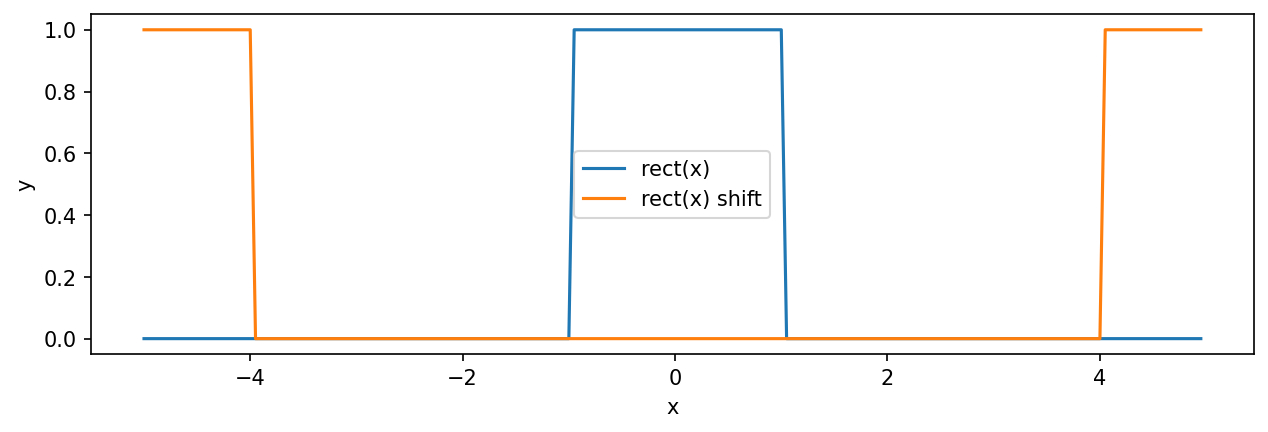

In [ ]:
Lx=10
dx=0.05
xmin=-Lx/2
xmax=Lx/2
fxmax=1/(2*dx)
fxmin=-1/(2*dx)
dfx=1/Lx

plt.rcParams['figure.figsize'] = 10, 3
x=np.arange(xmin,xmax,dx)
fx=np.arange(fxmin,fxmax,dfx) 

def rect1d(x,anch,pos):
    n=len(x)
    R1=np.zeros(n)
    R2=np.zeros(n)
    R1[x>pos-anch/2]=1
    R2[x<pos+anch/2]=1
    R=R1*R2
    return R

y=rect1d(x,2,-0)
plt.figure(dpi=150)
plt.plot(x,y,label='rect(x) ')
  
    
import scipy.fft as sft    
ys=sft.fftshift(y)

plt.plot(x,ys,label='rect(x) shift')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')

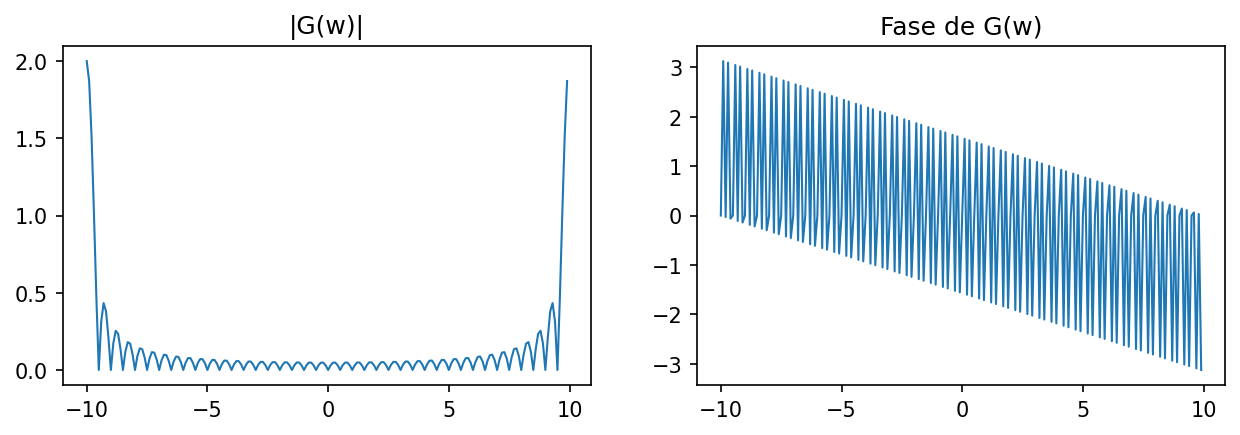

In [ ]:
fy=sft.fft(y)*dx

fig, (ax1, ax2) = plt.subplots(1, 2,dpi=150) 
ax1.plot(fx,np.abs(fy),linewidth=1)
ax1.title.set_text('|G(w)|')
ax2.plot(fx,np.angle(fy),linewidth=1)
ax2.title.set_text('Fase de G(w)')


In [ ]:
fy=sft.fft(ys)*dx

fig, (ax1, ax2) = plt.subplots(1, 2,dpi=150) 
ax1.plot(fx,np.abs(fy),linewidth=1)
ax1.title.set_text('|G(w)|')
ax2.plot(fx,np.angle(fy),linewidth=1)
ax2.title.set_text('Fase de G(w)')

NameError: ignored

In [ ]:
fy=sft.fftshift(sft.fft(ys)*dx)
fya=w*np.sinc(w*fx)

fig, (ax1, ax2) = plt.subplots(1, 2,dpi=150) 
ax1.plot(fx,np.abs(fy),linewidth=1,label='espectro digital')
ax1.title.set_text('|G(w)|')
ax1.plot(fx,np.abs(fya),linewidth=1,linestyle='--',label='espectro analitico')

ax2.plot(fx,np.angle(fy),linewidth=1,label='espectro digital')
ax2.plot(fx,np.angle(fya),linewidth=1,linestyle='--',label='espectro analitico')
ax2.title.set_text('Fase de G(w)')
ax1.legend(loc='best')
ax2.legend(loc='best')

NameError: ignored

Ahora veamos que ocurre con fft de numpy

In [ ]:
Lx=10
dx=0.05
xmin=-Lx/2
xmax=Lx/2
fxmax=1/(2*dx)
fxmin=-1/(2*dx)
dfx=1/Lx

x=np.arange(xmin,xmax,dx)
fx=np.arange(fxmin,fxmax,dfx) 

def rect1d(x,anch,pos):
    n=len(x)
    R1=np.zeros(n)
    R2=np.zeros(n)
    R1[x>pos-anch/2]=1
    R2[x<pos+anch/2]=1
    R=R1*R2
    return R

w=2

y=rect1d(x,w,0)
plt.figure(dpi=120)
plt.plot(x,y,label='rect(x) ')
  
    
import numpy.fft as nft    
ys=sft.fftshift(y)

plt.plot(x,ys,label='rect(x) shift')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')

In [ ]:
fy=nft.fft(y)*dx
fig, (ax1, ax2) = plt.subplots(1, 2,dpi=150) 
ax1.plot(fx,np.abs(fy),linewidth=1)

ax1.title.set_text('|G(w)|')
ax2.plot(fx,np.angle(fy),linewidth=1)

ax2.title.set_text('Fase de G(w)')

In [ ]:
fy=nft.fft(ys)*dx

fig, (ax1, ax2) = plt.subplots(1, 2,dpi=150) 
ax1.plot(fx,np.abs(fy),linewidth=1)
ax1.title.set_text('|G(w)|')
ax2.plot(fx,np.angle(fy),linewidth=1)
ax2.title.set_text('Fase de G(w)')

In [ ]:
fy=nft.fftshift(nft.fft(ys)*dx)

fya=w*np.sinc(w*fx)
fig, (ax1, ax2) = plt.subplots(1, 2,dpi=150) 
ax1.plot(fx,np.abs(fy),linewidth=1)
ax1.plot(fx,np.abs(fya),linewidth=1,linestyle='--')
ax1.title.set_text('|G(w)|')
ax2.plot(fx,np.angle(fy),linewidth=1,)
ax2.plot(fx,np.angle(fya),linewidth=1,linestyle='--')
ax2.title.set_text('Fase de G(w)')

Como se puede ver, la fft de numpy presenta inestabilidad en la fase. Por este motivo es preferible la fft de scipy. Otro ejemplo, veamos como es el tiempo de computo para cada caso

In [ ]:
s=2**16


x=np.random.rand(s)

print(len(x),x.dtype)
import timeit

def testnumpy():
    fx=nft.fft(x)
    
a=timeit.timeit(testnumpy, number=100)
print('Computacion con numpy:',a/100,'s')  

def testsci():
    fx=sft.fft(x)
    
a=timeit.timeit(testsci, number=100)
print('Computacion con scipy:',a/100,'s')  


En general, la fft de scipy es mucho mas rapida, especialmente cuando la entrada es real.

### FFT 2D

Ya vimos como crear espacios coordenados en 2D con meshgrid, asi que podemos computar la fft y graficar en dos dimensiones con facilidad. 

In [ ]:
Lx=10
dx=0.02
xmin=-Lx/2
xmax=Lx/2
fxmax=1/(2*dx)
fxmin=-1/(2*dx)
dfx=1/Lx


Ly=10
dy=0.02
ymin=-Ly/2
ymax=Ly/2
fymax=1/(2*dy)
fymin=-1/(2*dy)
dfy=1/L

x=np.arange(xmin,xmax,dx)
y=np.arange(ymin,ymax,dy)

xx, yy=np.meshgrid(x,y)

fx=np.arange(fxmin,fxmax,dfx) 
fy=np.arange(fymin,fymax,dfy) 

fxx, fyy=np.meshgrid(fx,fy)

Definamos la funcion rect2d

In [ ]:
R=np.zeros([1,len(x)])
R[0,:]=rect1d(x,0.5,0)

z=R.T@R

plt.rcParams['figure.figsize'] = 5, 5
plt.contourf(x,y,z)


In [ ]:
zs=sft.fftshift(z)
plt.contourf(x,y,zs)

In [ ]:
fz=sft.fft2(z)*dx*dy


plt.rcParams['figure.figsize'] = 10, 5

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot_surface(fxx,fyy,np.abs(fz))
ax.title.set_text('|G(w)|')

ax = fig.add_subplot(1, 2,2)
ax.contourf(fx,fy,np.angle(fz))
ax.title.set_text('Fase de G(w)')
plt.show()

In [ ]:
fz=sft.fft2(zs)*dx*dy


plt.rcParams['figure.figsize'] = 10, 5

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot_surface(fxx,fyy,np.abs(fz))
ax.title.set_text('|G(w)|')

ax = fig.add_subplot(1, 2,2)
ax.contourf(fx,fy,np.angle(fz))
ax.title.set_text('Fase de G(w)')
plt.show()

In [ ]:
fz=sft.fftshift(sft.fft2(zs)*dx*dy)


plt.rcParams['figure.figsize'] = 10, 5

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot_surface(fxx,fyy,np.abs(fz))
ax.title.set_text('|G(w)|')

ax = fig.add_subplot(1, 2,2)
ax.contourf(fx,fy,np.angle(fz))
ax.title.set_text('Fase de G(w)')
plt.show()

### Convolucion 2D

Ahora veamos la convolucion de dos funciones 2D, una gaussiana y una rect

In [ ]:
def gaussiana(x, amp, cen,anc):
    return amp*np.exp(-(x-cen)**2/anc)

Lx=10
dx=0.02
xmin=-Lx/2
xmax=Lx/2
fxmax=1/(2*dx)
fxmin=-1/(2*dx)
dfx=1/Lx


Ly=10
dy=0.02
ymin=-Ly/2
ymax=Ly/2
fymax=1/(2*dy)
fymin=-1/(2*dy)
dfy=1/L

x=np.arange(xmin,xmax,dx)
y=np.arange(ymin,ymax,dy)

xx, yy=np.meshgrid(x,y)

fx=np.arange(fxmin,fxmax,dfx) 
fy=np.arange(fymin,fymax,dfy) 

fxx, fyy=np.meshgrid(fx,fy)

R=np.zeros([1,len(x)])
R[0,:]=rect1d(x,4,0)
z1=R.T@R

Rx=np.zeros([1,len(x)])
Rx[0,:]=gaussiana(x,1,0,0.5)
Ry=np.zeros([1,len(x)])
Ry[0,:]=gaussiana(y,1,0,0.5)
z2=Rx.T@Ry


plt.rcParams['figure.figsize'] = 10, 5

fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot_surface(xx,yy,z1)
ax.title.set_text('z1')

ax = fig.add_subplot(1, 2,2, projection='3d')
ax.plot_surface(xx,yy,z2)
ax.title.set_text('z2')
plt.show()

In [ ]:
fz1=sft.fftshift(sft.fft2(sft.fftshift(z1)))
fz2=sft.fftshift(sft.fft2(sft.fftshift(z2)))

ff=fz1*fz2

rz=sft.fftshift(sft.ifft2(sft.fftshift(ff)))*dx*dy


fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot_surface(xx,yy,np.abs(rz))
ax.title.set_text('convolucion')

ax = fig.add_subplot(1, 2,2)
ax.contourf(x,y,np.angle(rz))
ax.title.set_text('fase de la convolucion')
plt.show()


Otro ejemplo es el desplazamiento. Consideremos la convolucion de una funcion rect y una delta

In [ ]:
def fusion(M1,M2,x,y):
    (m,n)=M1.shape
    (mm,nn)=M2.shape
    if mm>m or nn>n:
        raise ValueError('La matriz a instertar debe ser mas pequeña que la original')
    M1[np.int32(np.ceil((m-mm)*0.5)+y):np.int32(np.ceil((m+mm)*0.5)+y),np.int32(np.ceil((n-nn)*0.5)+x):np.int32(np.ceil((m+nn)*0.5)+x)]=M2
    MC=np.copy(M1)
    return MC

x=np.arange(xmin,xmax,dx)
y=np.arange(ymin,ymax,dy)

xx, yy=np.meshgrid(x,y)

fx=np.arange(fxmin,fxmax,dfx) 
fy=np.arange(fymin,fymax,dfy) 

fxx, fyy=np.meshgrid(fx,fy)

In [ ]:
R=np.zeros([1,len(x)])
R[0,:]=rect1d(x,4,0)
z1=R.T@R

z2=np.zeros((len(x),len(y)))
z2=fusion(z2,np.ones((1,1)),-50,50)



fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot_surface(xx,yy,z1)
ax.title.set_text('z1')

ax = fig.add_subplot(1, 2,2, projection='3d')
ax.plot_surface(xx,yy,z2)
ax.title.set_text('z2')
plt.show()

In [ ]:
fz1=sft.fftshift(sft.fft2(sft.fftshift(z1)))
fz2=sft.fftshift(sft.fft2(sft.fftshift(z2)))

fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot_surface(xx,yy,np.abs(fz2))
ax.title.set_text('|F{Z2}|')

ax = fig.add_subplot(1, 2,2)
ax.contourf(fx,fy,np.angle(fz2))
ax.title.set_text('fase F{z2}')
plt.show()

In [ ]:
ff=fz1*fz2

rz=sft.fftshift(sft.ifft2(sft.fftshift(ff)))*dx*dy


fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot_surface(xx,yy,np.abs(rz))
ax.title.set_text('convolucion')

ax = fig.add_subplot(1, 2,2)
ax.contourf(x,y,np.angle(rz))
ax.title.set_text('fase de la convolucion')
plt.show()